### Carregar os dados

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Carrega o arquivo CSV chamado 'dataset.csv' em um DataFrame do pandas
df = pd.read_csv('dataset.csv')

# Exibe o número de linhas e colunas do DataFrame
print(df.shape)  

# Mostra os tipos de dados de cada coluna do DataFrame
print(df.dtypes)  

# Exibe as 10 primeiras linhas do DataFrame
df.head(10) 

(686327, 9)
Genero_Usuario     object
Idade_Usuario       int64
Bike                int64
Estacao_Aluguel     int64
Data_Aluguel       object
Hora_Aluguel       object
Estacao_Chegada     int64
Data_Chegada       object
Hora_Chegada       object
dtype: object


,Genero_Usuario,Idade_Usuario,Bike,Estacao_Aluguel,Data_Aluguel,Hora_Aluguel,Estacao_Chegada,Data_Chegada,Hora_Chegada
0,M,44,4357,442,01/02/2020,0:00:38,116,01/02/2020,0:35:17
1,M,22,12083,66,01/02/2020,0:00:53,37,01/02/2020,0:06:23
2,M,29,11562,331,01/02/2020,0:00:55,341,01/02/2020,0:26:47
3,M,27,10206,164,01/02/2020,0:01:18,35,01/02/2020,0:16:51
4,M,27,10101,120,01/02/2020,0:01:18,47,01/02/2020,0:12:39
5,M,26,8458,69,01/02/2020,0:01:30,127,01/02/2020,0:13:03
6,M,25,9684,20,01/02/2020,0:01:54,125,01/02/2020,0:06:26
7,M,29,7251,359,01/02/2020,0:01:59,356,01/02/2020,0:06:59
8,F,31,7425,43,01/02/2020,0:03:05,43,01/02/2020,0:33:21
9,F,44,6922,43,01/02/2020,0:03:51,263,01/02/2020,0:25:18


### Análise Exploratória

In [3]:
# Alterar as colunas de data para formato datetime
df['Data_Aluguel'] = pd.to_datetime(df['Data_Aluguel'], format='%d/%m/%Y')
df['Data_Chegada'] = pd.to_datetime(df['Data_Chegada'], format='%d/%m/%Y')

# Alterar as colunas de hora para formato de hora
df['Hora_Aluguel'] = pd.to_datetime(df['Hora_Aluguel'], format='%H:%M:%S').dt.time
df['Hora_Chegada'] = pd.to_datetime(df['Hora_Chegada'], format='%H:%M:%S').dt.time

# Exibir as alterações
print(df.dtypes)
df.head(10)

Genero_Usuario             object
Idade_Usuario               int64
Bike                        int64
Estacao_Aluguel             int64
Data_Aluguel       datetime64[ns]
Hora_Aluguel               object
Estacao_Chegada             int64
Data_Chegada       datetime64[ns]
Hora_Chegada               object
dtype: object


,Genero_Usuario,Idade_Usuario,Bike,Estacao_Aluguel,Data_Aluguel,Hora_Aluguel,Estacao_Chegada,Data_Chegada,Hora_Chegada
0,M,44,4357,442,2020-02-01,00:00:38,116,2020-02-01,00:35:17
1,M,22,12083,66,2020-02-01,00:00:53,37,2020-02-01,00:06:23
2,M,29,11562,331,2020-02-01,00:00:55,341,2020-02-01,00:26:47
3,M,27,10206,164,2020-02-01,00:01:18,35,2020-02-01,00:16:51
4,M,27,10101,120,2020-02-01,00:01:18,47,2020-02-01,00:12:39
5,M,26,8458,69,2020-02-01,00:01:30,127,2020-02-01,00:13:03
6,M,25,9684,20,2020-02-01,00:01:54,125,2020-02-01,00:06:26
7,M,29,7251,359,2020-02-01,00:01:59,356,2020-02-01,00:06:59
8,F,31,7425,43,2020-02-01,00:03:05,43,2020-02-01,00:33:21
9,F,44,6922,43,2020-02-01,00:03:51,263,2020-02-01,00:25:18


In [4]:
# Somando a quantidade de valores NaN
df.isnull().sum()

Genero_Usuario     0
Idade_Usuario      0
Bike               0
Estacao_Aluguel    0
Data_Aluguel       0
Hora_Aluguel       0
Estacao_Chegada    0
Data_Chegada       0
Hora_Chegada       0
dtype: int64

### Adicionando colunas extras de feriados nacionais

In [5]:
# Carrega o arquivo CSV chamado 'feriados_nacionais.csv' em um DataFrame,
feriados = pd.read_csv('feriados_nacionais.csv', sep=';')

# Converte a coluna 'Data' para o formato de data (datetime)
feriados['Data'] = pd.to_datetime(feriados['Data'], format='%d/%m/%Y')

feriados.head(10)

,Data,Dia da Semana,Feriado
0,2020-01-01,quarta-feira,Confraternização Universal
1,2020-02-24,segunda-feira,Carnaval
2,2020-02-25,terça-feira,Carnaval
3,2020-04-10,sexta-feira,Paixão de Cristo
4,2020-04-21,terça-feira,Tiradentes
5,2020-05-01,sexta-feira,Dia do Trabalho
6,2020-06-11,quinta-feira,Corpus Christi
7,2020-09-07,segunda-feira,Independência do Brasil
8,2020-10-12,segunda-feira,Nossa Sr.a Aparecida - Padroeira do Brasil
9,2020-11-02,segunda-feira,Finados


In [6]:
# Criação da coluna de dia da semana
df['Dia_Aluguel'] = df['Data_Aluguel'].dt.dayofweek
df['Dia_Aluguel'] = df['Dia_Aluguel'].map({0:'Seg',1:'Ter',2:'Qua',3:'Qui',4:'Sex',5:'Sab',6:'Dom'})

df['Dia_Chegada'] = df['Data_Chegada'].dt.dayofweek
df['Dia_Chegada'] = df['Dia_Chegada'].map({0:'Seg',1:'Ter',2:'Qua',3:'Qui',4:'Sex',5:'Sab',6:'Dom'})

# Identificação das observações que foram em feriados
df['Feriado_Aluguel'] = [dia in list(feriados['Data']) for dia in df['Data_Aluguel']]
df['Feriado_Chegada'] = [dia in list(feriados['Data']) for dia in df['Data_Chegada']]

# Definição de dia útil ou não
df['Dia_Util_Aluguel'] = ~((df['Data_Aluguel'].dt.weekday >= 5) | df['Feriado_Aluguel'])
df['Dia_Util_Chegada'] = ~((df['Data_Chegada'].dt.weekday >= 5) | df['Feriado_Chegada'])

df.head(5)

,Genero_Usuario,Idade_Usuario,Bike,Estacao_Aluguel,Data_Aluguel,Hora_Aluguel,Estacao_Chegada,Data_Chegada,Hora_Chegada,Dia_Aluguel,Dia_Chegada,Feriado_Aluguel,Feriado_Chegada,Dia_Util_Aluguel,Dia_Util_Chegada
0,M,44,4357,442,2020-02-01,00:00:38,116,2020-02-01,00:35:17,Sab,Sab,False,False,False,False
1,M,22,12083,66,2020-02-01,00:00:53,37,2020-02-01,00:06:23,Sab,Sab,False,False,False,False
2,M,29,11562,331,2020-02-01,00:00:55,341,2020-02-01,00:26:47,Sab,Sab,False,False,False,False
3,M,27,10206,164,2020-02-01,00:01:18,35,2020-02-01,00:16:51,Sab,Sab,False,False,False,False
4,M,27,10101,120,2020-02-01,00:01:18,47,2020-02-01,00:12:39,Sab,Sab,False,False,False,False


In [7]:
# Concatenar colunas de data e hora
df['Data_Aluguel'] = pd.to_datetime(df['Data_Aluguel'].astype(str) + ' ' + df['Hora_Aluguel'].astype(str))
df['Data_Chegada'] = pd.to_datetime(df['Data_Chegada'].astype(str) + ' ' + df['Hora_Chegada'].astype(str))

# Excluir as colunas de hora
df.drop(columns=['Hora_Aluguel', 'Hora_Chegada'], inplace=True)

In [8]:
# Trocando a colula final de semana de valores inteiros para strings
feriado = {0:'Não é feriado', 1:'Feriado'}
df['Feriado_Aluguel'] = df['Feriado_Aluguel'].apply(lambda y:feriado[y])

feriado = {0:'Não é feriado', 1:'Feriado'}
df['Feriado_Chegada'] = df['Feriado_Chegada'].apply(lambda y:feriado[y])

# Trocando a colula final de semana de valores inteiros para strings
dia_util = {0:'Não é dia util', 1:'Dia util'}
df['Dia_Util_Aluguel'] = df['Dia_Util_Aluguel'].apply(lambda z:dia_util[z])

dia_util = {0:'Não é dia util', 1:'Dia util'}
df['Dia_Util_Chegada'] = df['Dia_Util_Chegada'].apply(lambda z:dia_util[z])

df.head(5)

,Genero_Usuario,Idade_Usuario,Bike,Estacao_Aluguel,Data_Aluguel,Estacao_Chegada,Data_Chegada,Dia_Aluguel,Dia_Chegada,Feriado_Aluguel,Feriado_Chegada,Dia_Util_Aluguel,Dia_Util_Chegada
0,M,44,4357,442,2020-02-01 00:00:38,116,2020-02-01 00:35:17,Sab,Sab,Não é feriado,Não é feriado,Não é dia util,Não é dia util
1,M,22,12083,66,2020-02-01 00:00:53,37,2020-02-01 00:06:23,Sab,Sab,Não é feriado,Não é feriado,Não é dia util,Não é dia util
2,M,29,11562,331,2020-02-01 00:00:55,341,2020-02-01 00:26:47,Sab,Sab,Não é feriado,Não é feriado,Não é dia util,Não é dia util
3,M,27,10206,164,2020-02-01 00:01:18,35,2020-02-01 00:16:51,Sab,Sab,Não é feriado,Não é feriado,Não é dia util,Não é dia util
4,M,27,10101,120,2020-02-01 00:01:18,47,2020-02-01 00:12:39,Sab,Sab,Não é feriado,Não é feriado,Não é dia util,Não é dia util


In [9]:
# Configurar estilo dos gráficos
sns.set(style="whitegrid")

In [10]:
# Calcular a duração de cada aluguel
df['Duracao'] = (df['Data_Chegada'] - df['Data_Aluguel']).dt.total_seconds() / 60  # Duração em minutos

### 1. Quais são as Top 5 estações com maior número de aluguel de bikes?

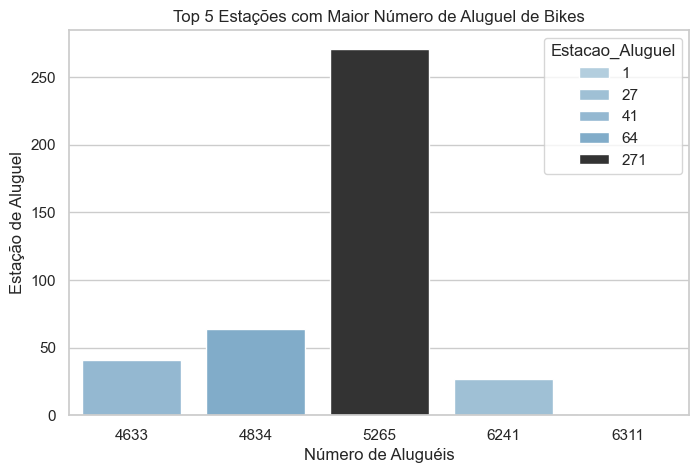

In [11]:
# Pergunta 1: Top 5 estações com maior número de aluguel de bikes
top_5_estacoes = df['Estacao_Aluguel'].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_estacoes.values, y=top_5_estacoes.index, palette="Blues_d", hue=top_5_estacoes.index)
plt.title("Top 5 Estações com Maior Número de Aluguel de Bikes")
plt.xlabel("Número de Aluguéis")
plt.ylabel("Estação de Aluguel")    
plt.show()

### 2. Quais são as Top 5 rotas, com base na estação inicial e final, e a média de duração de cada aluguel?

In [12]:
# Criando a coluna 'Rota'
df['Rota'] = df['Estacao_Aluguel'].astype(str) + ' - ' + df['Estacao_Chegada'].astype(str)

# Agrupando e calculando as agregações
top_5_rotas = df.groupby('Rota')['Duracao'].agg(['count', 'mean']).sort_values(by='count', ascending=False)

# Renomeando as colunas
top_5_rotas.rename(columns={'count': 'Qtd', 'mean': 'Média'}, inplace=True)

# Convertendo os valores de 'Média' (minutos) para o formato hh:mm:ss
top_5_rotas['Média'] = top_5_rotas['Média'].apply(lambda x: str(pd.to_datetime(x, unit='m').strftime('%H:%M:%S')))

# Exibindo as top 5 rotas
top_5_rotas.head(5)

,Qtd,Média
Rota,,
33 - 33,376,00:30:49
18 - 1,319,00:05:34
449 - 449,304,00:17:18
211 - 217,303,00:03:32
208 - 206,298,00:09:08


### 3. Quem aluga mais bikes, homens ou mulheres? Qual o tempo médio de aluguel de bikes?

In [13]:
# Agrupar os dados por gênero e calcular o número de aluguéis (count) e a duração média (mean)
alugueis_por_genero = df.groupby('Genero_Usuario')['Duracao'].agg(['count', 'mean'])

# Converter a coluna 'mean' (média de duração) para o formato hh:mm:ss
alugueis_por_genero['mean_hhmmss'] = alugueis_por_genero['mean'].apply(
    lambda x: pd.to_datetime(x, unit='m').strftime('%H:%M:%S'))  # Converte minutos para horas:minutos:segundos

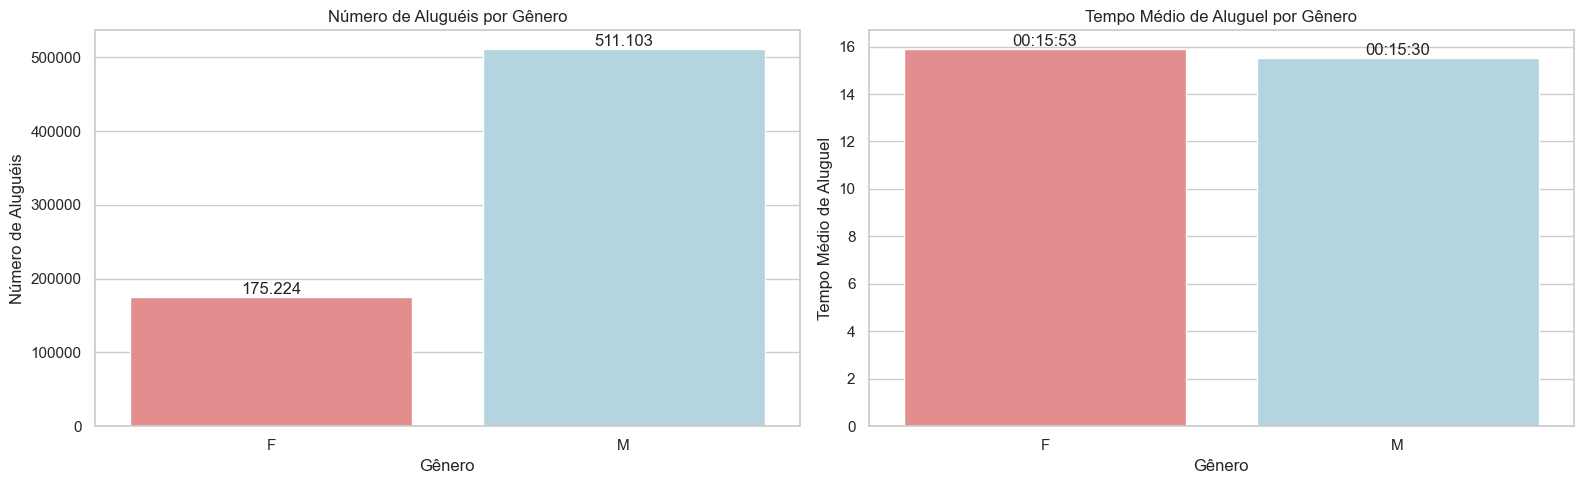

In [14]:
# Criar a figura com dois subgráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

# Definir paleta de cores personalizada (tons claros) para cada gênero
cores = ['lightblue' if genero == 'M' else 'lightcoral' for genero in alugueis_por_genero.index]

# Gráfico 1: Número de aluguéis por gênero
sns.barplot(
    ax=axes[0], 
    x=alugueis_por_genero.index, 
    y=alugueis_por_genero['count'], 
    palette=cores, 
    hue=alugueis_por_genero.index
)
axes[0].set_title("Número de Aluguéis por Gênero")  # Define o título do gráfico
axes[0].set_xlabel("Gênero")  # Define o rótulo do eixo X
axes[0].set_ylabel("Número de Aluguéis")  # Define o rótulo do eixo Y

# Adicionar rótulos nos valores das barras
for i, value in enumerate(alugueis_por_genero['count']):
    axes[0].text(i, value + 0.5, f'{int(value):,}'.replace(',', '.'), ha='center', va='bottom', fontsize=12)

# Gráfico 2: Tempo médio de aluguel por gênero (formato hh:mm:ss)
sns.barplot(
    ax=axes[1], 
    x=alugueis_por_genero.index, 
    y=alugueis_por_genero['mean'], 
    palette=cores, 
    hue=alugueis_por_genero.index
)
axes[1].set_title("Tempo Médio de Aluguel por Gênero")  # Define o título do gráfico
axes[1].set_xlabel("Gênero")  # Define o rótulo do eixo X
axes[1].set_ylabel("Tempo Médio de Aluguel")  # Define o rótulo do eixo Y

# Adicionar rótulos nos valores das barras com o tempo formatado (hh:mm:ss)
for i, value in enumerate(alugueis_por_genero['mean']):
    formatted_time = alugueis_por_genero.iloc[i]['mean_hhmmss']  # Pega o valor formatado em hh:mm:ss
    axes[1].text(i, value + 0.02, formatted_time, ha='center', va='bottom', fontsize=12)

# Ajustar o layout para evitar sobreposição de elementos
plt.tight_layout()

# Exibir os gráficos
plt.show()

### 4. Qual faixa etária aluga mais bikes? Qual o tempo médio de aluguel de bikes?

In [15]:
# Definir faixas etárias para categorizar os usuários com base na idade
df['Faixa_Etaria'] = pd.cut(
    df['Idade_Usuario'],  # Coluna com as idades dos usuários
    bins=[0, 19, 29, 39, 49, 59, 69, np.inf],  # Intervalos das faixas etárias
    labels=['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+'],  # Nomes das faixas etárias
    right=True  # Inclui o limite superior no intervalo
)

# Agrupar os dados por faixa etária e calcular o número de aluguéis (count) e a duração média (mean)
faixa_etaria = df.groupby('Faixa_Etaria', observed=False)['Duracao'].agg(['count', 'mean'])

# Converter a duração média para o formato hh:mm:ss
faixa_etaria['mean_hhmmss'] = faixa_etaria['mean'].apply(
    lambda x: pd.to_datetime(x, unit='m').strftime('%H:%M:%S')  # Converte minutos para horas:minutos:segundos
)

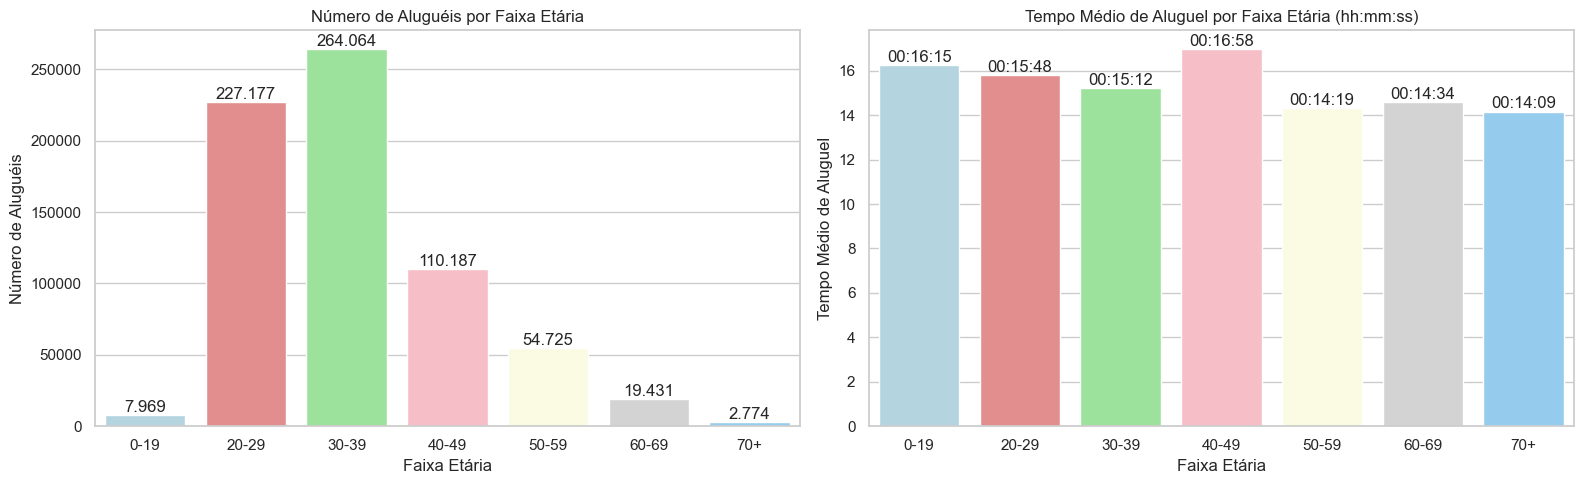

In [16]:
# Criar a figura com dois subgráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

# Paleta de cores personalizada (tons claros)
cores = ['lightblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightyellow', 'lightgray', 'lightskyblue']

# Gráfico 1: Número de aluguéis por faixa etária
sns.barplot(
    ax=axes[0], 
    x=faixa_etaria.index, 
    y=faixa_etaria['count'], 
    palette=cores, 
    hue=faixa_etaria.index
)
axes[0].set_title("Número de Aluguéis por Faixa Etária")  # Define o título do gráfico
axes[0].set_xlabel("Faixa Etária")  # Define o rótulo do eixo X
axes[0].set_ylabel("Número de Aluguéis")  # Define o rótulo do eixo Y

# Adicionar rótulos com os valores exatos acima das barras
for i, value in enumerate(faixa_etaria['count']):
    axes[0].text(i, value + 0.5, f'{int(value):,}'.replace(',', '.'), ha='center', va='bottom', fontsize=12)

# Gráfico 2: Tempo médio de aluguel por faixa etária (formato hh:mm:ss)
sns.barplot(
    ax=axes[1], 
    x=faixa_etaria.index, 
    y=faixa_etaria['mean'], 
    palette=cores, 
    hue=faixa_etaria.index
)
axes[1].set_title("Tempo Médio de Aluguel por Faixa Etária (hh:mm:ss)")  # Define o título do gráfico
axes[1].set_xlabel("Faixa Etária")  # Define o rótulo do eixo X
axes[1].set_ylabel("Tempo Médio de Aluguel")  # Define o rótulo do eixo Y

# Adicionar rótulos com o tempo médio formatado (hh:mm:ss)
for i, value in enumerate(faixa_etaria['mean']):
    formatted_time = faixa_etaria.iloc[i]['mean_hhmmss']  # Obtém o valor formatado em hh:mm:ss
    axes[1].text(i, value + 0.02, formatted_time, ha='center', va='bottom', fontsize=12)

# Ajustar o layout para evitar sobreposição de elementos
plt.tight_layout()

# Exibir os gráficos
plt.show()


### 5. Quais são as estações com maior número de bikes alugadas/devolvidas?

In [17]:
# Contando as ocorrências de cada estação na coluna 'Estacao_Aluguel'
top_5_estacoes_alugadas = df['Estacao_Aluguel'].value_counts().head(5).reset_index()
top_5_estacoes_alugadas.columns = ['Estacao_Aluguel', 'Qtd de Aluguéis']

top_5_estacoes_alugadas

,Estacao_Aluguel,Qtd de Aluguéis
0,1,6311
1,27,6241
2,271,5265
3,64,4834
4,41,4633


In [18]:
# Contando as ocorrências de cada estação na coluna 'Estacao_Chegada'
top_5_estacoes_devolvidas = df['Estacao_Chegada'].value_counts().head(5).reset_index()
top_5_estacoes_devolvidas.columns = ['Estacao_Chegada', 'Qtd de Devoluções']

top_5_estacoes_devolvidas

,Estacao_Chegada,Qtd de Devoluções
0,266,6513
1,27,6220
2,1,6115
3,43,5179
4,64,5165


### 1. Pergunta Extra: Qual dia da semana se aluga/devolve mais bikes? Qual o tempo médio de aluguel?

In [19]:
# Agrupando e calculando as agregações por Dia_Aluguel
top_5_dias = df.groupby('Dia_Aluguel')['Duracao'].agg(['count', 'mean']).sort_values(by='count', ascending=False)

# Renomeando as colunas
top_5_dias.rename(columns={'count': 'Qtd', 'mean': 'Média'}, inplace=True)

# Formatando a coluna 'Qtd' com separador de milhar
top_5_dias['Qtd'] = top_5_dias['Qtd'].apply(lambda x: f"{x:,}".replace(',', '.'))

# Convertendo os valores de 'Média' (minutos) para o formato hh:mm:ss
top_5_dias['Média'] = top_5_dias['Média'].apply(lambda x: str(pd.to_datetime(x, unit='m').strftime('%H:%M:%S')))

In [20]:
# Agrupando e calculando as agregações por Dia_Chegada
top_5_chegada = df.groupby('Dia_Chegada')['Duracao'].agg(['count', 'mean']).sort_values(by='count', ascending=False)

# Renomeando as colunas
top_5_chegada.rename(columns={'count': 'Qtd', 'mean': 'Média'}, inplace=True)

# Formatando a coluna 'Qtd' com separador de milhar
top_5_chegada['Qtd'] = top_5_chegada['Qtd'].apply(lambda x: f"{x:,}".replace(',', '.'))

# Convertendo os valores de 'Média' (minutos) para o formato hh:mm:ss
top_5_chegada['Média'] = top_5_chegada['Média'].apply(lambda x: str(pd.to_datetime(x, unit='m').strftime('%H:%M:%S')))

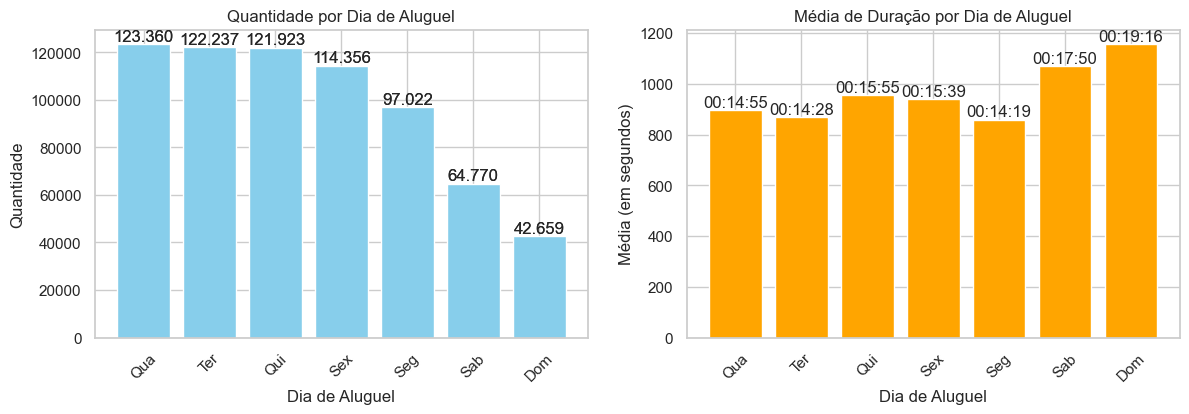

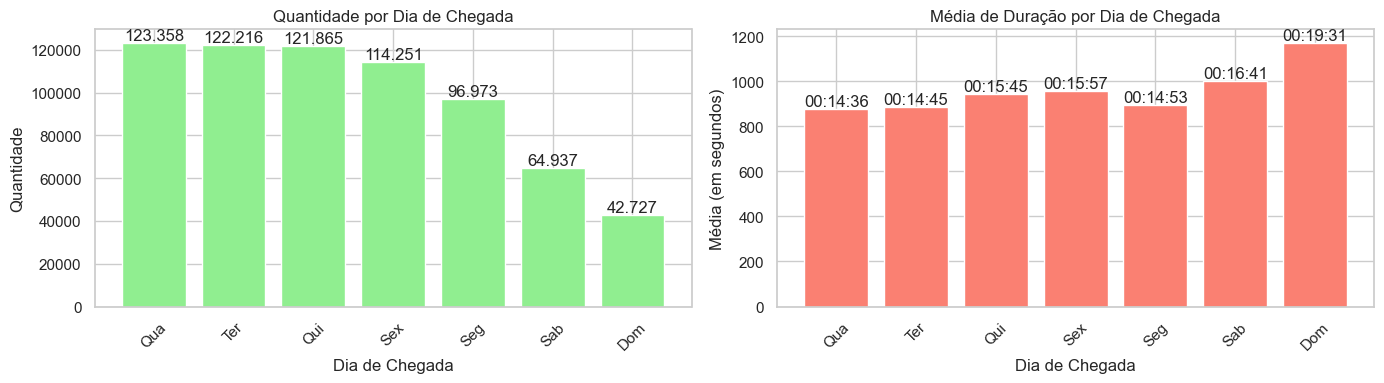

In [21]:
# Criando os gráficos para Dia_Aluguel
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Gráfico para 'Qtd' de Dia_Aluguel
axes[0].bar(top_5_dias.index, top_5_dias['Qtd'].apply(lambda x: float(x.replace('.', '').replace(',', '.'))), color='skyblue')
axes[0].set_title('Quantidade por Dia de Aluguel')
axes[0].set_xlabel('Dia de Aluguel')
axes[0].set_ylabel('Quantidade')
axes[0].tick_params(axis='x', rotation=45)

# Adicionar rótulos com os valores exatos acima das barras (Qtd)
for i, value in enumerate(top_5_dias['Qtd']):
    axes[0].text(i, float(value.replace('.', '').replace(',', '.')) + 0.5, f'{value}', ha='center', va='bottom', fontsize=12)

# Gráfico para 'Média' de Dia_Aluguel
axes[1].bar(top_5_dias.index, top_5_dias['Média'].apply(lambda x: pd.to_datetime(x).hour*3600 + pd.to_datetime(x).minute*60 + pd.to_datetime(x).second), color='orange')
axes[1].set_title('Média de Duração por Dia de Aluguel')
axes[1].set_xlabel('Dia de Aluguel')
axes[1].set_ylabel('Média (em segundos)')
axes[1].tick_params(axis='x', rotation=45)

# Adicionar rótulos com os valores exatos acima das barras (Qtd)
for i, value in enumerate(top_5_dias['Qtd']):
    axes[0].text(i, float(value.replace('.', '').replace(',', '.')) + 0.5, f'{value}', ha='center', va='bottom', fontsize=12)

# Adicionar rótulos com o tempo médio formatado (hh:mm:ss)
for i, value in enumerate(top_5_dias['Média']):
    formatted_time = top_5_dias.iloc[i]['Média']  # Já está no formato correto
    axes[1].text(i, pd.to_datetime(value).hour * 3600 + pd.to_datetime(value).minute * 60 + pd.to_datetime(value).second + 0.02, formatted_time, ha='center', va='bottom', fontsize=12)

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Criando os gráficos para Dia_Chegada
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Gráfico para 'Qtd' de Dia_Chegada
axes[0].bar(top_5_chegada.index, top_5_chegada['Qtd'].apply(lambda x: float(x.replace('.', '').replace(',', '.'))), color='lightgreen')
axes[0].set_title('Quantidade por Dia de Chegada')
axes[0].set_xlabel('Dia de Chegada')
axes[0].set_ylabel('Quantidade')
axes[0].tick_params(axis='x', rotation=45)

# Adicionar rótulos com os valores exatos acima das barras (Qtd)
for i, value in enumerate(top_5_chegada['Qtd']):
    axes[0].text(i, float(value.replace('.', '').replace(',', '.')) + 0.5, f'{value}', ha='center', va='bottom', fontsize=12)

# Gráfico para 'Média' de Dia_Chegada
axes[1].bar(top_5_chegada.index, top_5_chegada['Média'].apply(lambda x: pd.to_datetime(x).hour*3600 + pd.to_datetime(x).minute*60 + pd.to_datetime(x).second), color='salmon')
axes[1].set_title('Média de Duração por Dia de Chegada')
axes[1].set_xlabel('Dia de Chegada')
axes[1].set_ylabel('Média (em segundos)')
axes[1].tick_params(axis='x', rotation=45)

# Adicionar rótulos com o tempo médio formatado (hh:mm:ss)
for i, value in enumerate(top_5_chegada['Média']):
    formatted_time = top_5_chegada.iloc[i]['Média']  # Já está no formato correto
    axes[1].text(i, pd.to_datetime(value).hour * 3600 + pd.to_datetime(value).minute * 60 + pd.to_datetime(value).second + 0.02, formatted_time, ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### 2. Pergunta Extra: Se aluga/devolve mais bikes em feriados ou dias úteis? E qual o percentual?

In [22]:
# Contando as ocorrências de cada valor nas colunas
count_feriado_aluguel = df['Feriado_Aluguel'].value_counts()
count_dia_util_aluguel = df['Dia_Util_Aluguel'].value_counts()
count_feriado_chegada = df['Feriado_Chegada'].value_counts()
count_dia_util_chegada = df['Dia_Util_Chegada'].value_counts()

# Juntando Feriado_Aluguel e Dia_Util_Aluguel
combined_feriado_dia_aluguel = pd.concat([count_feriado_aluguel, count_dia_util_aluguel], axis=1).fillna(0)
combined_feriado_dia_aluguel.columns = ['Feriado_Aluguel', 'Dia_Util_Aluguel']
combined_feriado_dia_aluguel = combined_feriado_dia_aluguel.sum(axis=1).sort_values(ascending=False)

# Juntando Feriado_Chegada e Dia_Util_Chegada
combined_feriado_dia_chegada = pd.concat([count_feriado_chegada, count_dia_util_chegada], axis=1).fillna(0)
combined_feriado_dia_chegada.columns = ['Feriado_Chegada', 'Dia_Util_Chegada']
combined_feriado_dia_chegada = combined_feriado_dia_chegada.sum(axis=1).sort_values(ascending=False)

# Calculando o percentual
total_feriado_dia_aluguel = combined_feriado_dia_aluguel.sum()
total_feriado_dia_chegada = combined_feriado_dia_chegada.sum()

percent_feriado_dia_aluguel = (combined_feriado_dia_aluguel / total_feriado_dia_aluguel) * 100
percent_feriado_dia_chegada = (combined_feriado_dia_chegada / total_feriado_dia_chegada) * 100

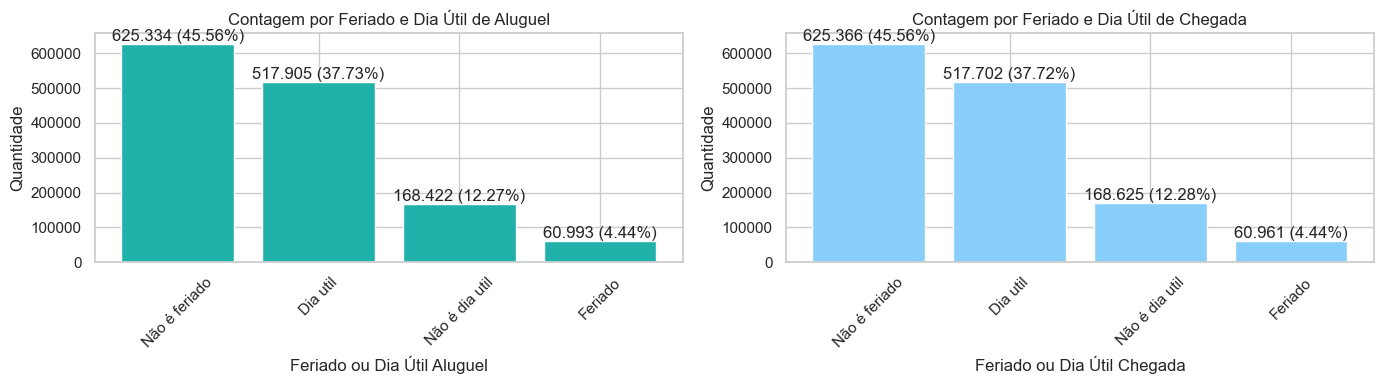

In [23]:
# Criando o gráfico para Feriado_Aluguel e Dia_Util_Aluguel
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Gráfico para Feriado_Aluguel e Dia_Util_Aluguel
axes[0].bar(combined_feriado_dia_aluguel.index, combined_feriado_dia_aluguel.values, color='lightseagreen')
axes[0].set_title('Contagem por Feriado e Dia Útil de Aluguel')
axes[0].set_xlabel('Feriado ou Dia Útil Aluguel')
axes[0].set_ylabel('Quantidade')
axes[0].tick_params(axis='x', rotation=45)

# Adicionar rótulos com os valores exatos e percentuais acima das barras
for i, value in enumerate(combined_feriado_dia_aluguel.values):
    percent = percent_feriado_dia_aluguel.iloc[i]
    axes[0].text(i, value + 0.5, f'{int(value):,}'.replace(',', '.') + f' ({percent:.2f}%)', ha='center', va='bottom', fontsize=12)

# Criando o gráfico para Feriado_Chegada e Dia_Util_Chegada
axes[1].bar(combined_feriado_dia_chegada.index, combined_feriado_dia_chegada.values, color='lightskyblue')
axes[1].set_title('Contagem por Feriado e Dia Útil de Chegada')
axes[1].set_xlabel('Feriado ou Dia Útil Chegada')
axes[1].set_ylabel('Quantidade')
axes[1].tick_params(axis='x', rotation=45)

# Adicionar rótulos com os valores exatos e percentuais acima das barras
for i, value in enumerate(combined_feriado_dia_chegada.values):
    percent = percent_feriado_dia_chegada.iloc[i]
    axes[1].text(i, value + 0.5, f'{int(value):,}'.replace(',', '.') + f' ({percent:.2f}%)', ha='center', va='bottom', fontsize=12)

# Ajustando o layout
plt.tight_layout()
plt.show()